In [1]:
import pandas as pd
from pysyncon import Dataprep, PenalizedSynth, Synth

In [2]:
df = pd.read_csv("../../data/basque.csv")

dataprep = Dataprep(
    foo=df,
    predictors=[
        "school.illit",
        "school.prim",
        "school.med",
        "school.high",
        "school.post.high",
        "invest",
    ],
    predictors_op="mean",
    time_predictors_prior=range(1964, 1970),
    special_predictors=[
        ("gdpcap", range(1960, 1970), "mean"),
        ("sec.agriculture", range(1961, 1970, 2), "mean"),
        ("sec.energy", range(1961, 1970, 2), "mean"),
        ("sec.industry", range(1961, 1970, 2), "mean"),
        ("sec.construction", range(1961, 1970, 2), "mean"),
        ("sec.services.venta", range(1961, 1970, 2), "mean"),
        ("sec.services.nonventa", range(1961, 1970, 2), "mean"),
        ("popdens", [1969], "mean"),
    ],
    dependent="gdpcap",
    unit_variable="regionname",
    time_variable="year",
    treatment_identifier="Basque Country (Pais Vasco)",
    controls_identifier=[
        "Aragon",
        "Baleares (Islas)",
        "Andalucia",
        "Canarias",
        "Cantabria",
        "Castilla Y Leon",
        "Castilla-La Mancha",
        "Cataluna",
        "Comunidad Valenciana",
        "Extremadura",
        "Galicia",
        "Madrid (Comunidad De)",
        "Murcia (Region de)",
        "Navarra (Comunidad Foral De)",
        "Principado De Asturias",
        "Rioja (La)",
        "Spain (Espana)",
    ],
    time_optimize_ssr=range(1960, 1970),
)

pen = PenalizedSynth()
pen.fit(dataprep, lambda_=0.01)

In [3]:
pen.weights()

Aragon                          0.000
Baleares (Islas)                0.000
Andalucia                       0.000
Canarias                        0.000
Cantabria                       0.241
Castilla Y Leon                 0.000
Castilla-La Mancha              0.000
Cataluna                        0.759
Comunidad Valenciana            0.000
Extremadura                     0.000
Galicia                         0.000
Madrid (Comunidad De)           0.000
Murcia (Region de)              0.000
Navarra (Comunidad Foral De)    0.000
Principado De Asturias          0.000
Rioja (La)                      0.000
Spain (Espana)                  0.000
Name: weights, dtype: float64

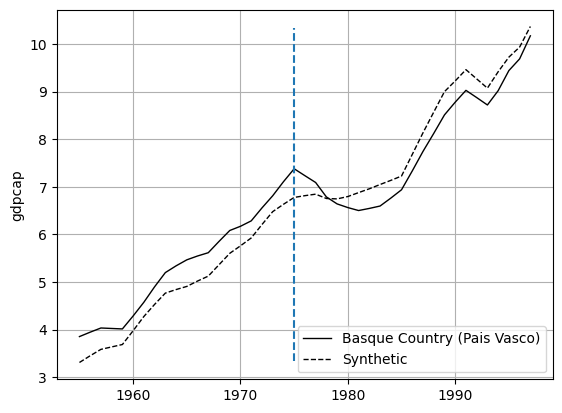

In [4]:
pen.path_plot(time_period=range(1955, 1998), treatment_time=1975)

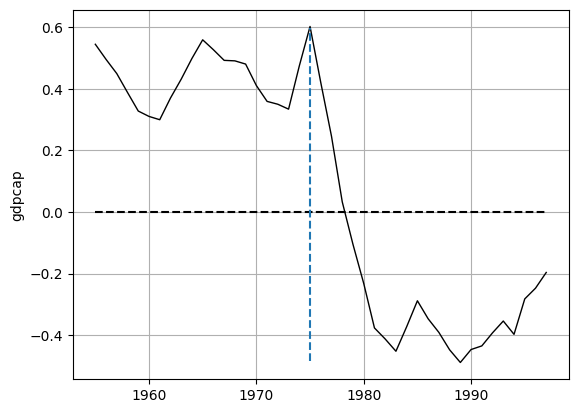

In [5]:
pen.gaps_plot(time_period=range(1955, 1998), treatment_time=1975)

In [6]:
pen.summary()

,treated,synthetic,sample mean
school.illit,39.888,213.304,323.826
school.prim,1031.742,2259.100,2182.453
school.med,90.359,169.182,148.864
school.high,25.728,50.057,47.133
school.post.high,13.480,25.277,26.163
invest,24.647,24.097,21.445
special.1.gdpcap,5.285,4.840,3.584
special.2.sec.agriculture,6.844,9.099,21.058
special.3.sec.energy,4.106,2.883,5.252
special.4.sec.industry,45.082,39.207,22.670


This method will recover the weights from the traditional synthetic control method if we set $\lambda = 0$ and use the appropriate $V$ matrix ($\Gamma$ matrix in the notation of the Abadie and L'Hour paper).

In [7]:
synth = Synth()
synth.fit(dataprep=dataprep)

pen.fit(dataprep=dataprep, lambda_=0.0, custom_V=synth.V)
pen.weights()

Aragon                          0.000
Baleares (Islas)                0.000
Andalucia                       0.000
Canarias                        0.000
Cantabria                       0.000
Castilla Y Leon                 0.000
Castilla-La Mancha              0.000
Cataluna                        0.851
Comunidad Valenciana            0.000
Extremadura                     0.000
Galicia                         0.000
Madrid (Comunidad De)           0.149
Murcia (Region de)              0.000
Navarra (Comunidad Foral De)    0.000
Principado De Asturias          0.000
Rioja (La)                      0.000
Spain (Espana)                  0.000
Name: weights, dtype: float64